# Machine Learning for Business & Data Visualisation CA2
    Kate O'Dwyer



https://www.kaggle.com/code/samruddhim/part-2-time-series-analysis

## Import Libraries & Remove Warnings 

In [1]:
#Disable the warnings
import warnings
warnings.filterwarnings('ignore')


#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.api as sm

import statistics as stats
from scipy import stats
import scipy as scipy

from wordcloud import WordCloud, STOPWORDS
import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import panel as pn 
pn.extension()
pn.extension('plotly')
import plotly.express as px

## Reading in Data Set

In [2]:
df = pd.read_csv('train.csv', na_values = 'na')

## Investigating Data Set

In [3]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [4]:
df.tail()

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country     City  \
9795    SH-19975     Sally Hughsby  Corporate  United States  Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States   Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States   Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States   Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States   Toledo   

         State  Postal Code   Region       Product ID         Category  \
9795  Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796      Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797      Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798      Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799      Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name    Sales  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.798  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.368  
9797       Phones                                        GE 30524EE4  235.188  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.376  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.384

In [5]:
df.info() #information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

- Will need to turn the data into a time series, will also need to remove the NaNs as there seems to be a lot at the the end of the data frame. Will also remove the unnamed column

In [6]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


- Will remove all NaNs first before proceeding.

# Data Cleaning

#### Drop 'Row ID'

In [7]:
df.drop(['Row ID'] , axis = 1 , inplace = True)

#### Drop NaNs

In [8]:
df.dropna(axis=0, inplace = True)

In [9]:
df.tail()

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
9795  CA-2017-125920  21/05/2017  28/05/2017  Standard Class    SH-19975   
9796  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   
9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   
9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   
9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   

         Customer Name    Segment        Country     City     State  \
9795     Sally Hughsby  Corporate  United States  Chicago  Illinois   
9796  Cindy Schnelling  Corporate  United States   Toledo      Ohio   
9797  Cindy Schnelling  Corporate  United States   Toledo      Ohio   
9798  Cindy Schnelling  Corporate  United States   Toledo      Ohio   
9799  Cindy Schnelling  Corporate  United States   Toledo      Ohio   

      Postal Code   Region       Product ID         Category Sub-Category  \
9795      60610.0  Central  OFF-BI-10003429  Office Supplies      Binders   
9796      43615.0     East  OFF-AR-10001374  Office Supplies          Art   
9797      43615.0     East  TEC-PH-10004977       Technology       Phones   
9798      43615.0     East  TEC-PH-10000912       Technology       Phones   
9799      43615.0     East  TEC-AC-10000487       Technology  Accessories   

                                           Product Name    Sales  
9795  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.798  
9796           BIC Brite Liner Highlighters, Chisel Tip   10.368  
9797                                        GE 30524EE4  235.188  
9798           Anker 24W Portable Micro USB Car Charger   26.376  
9799                SanDisk Cruzer 4 GB USB Flash Drive   10.384

In [10]:
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


#### Convert Date to datetime series

In [11]:
# Convert date column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'],format="%d/%m/%Y")

In [12]:
# Checking the data type 

df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

#### Check for duplicated values

In [13]:
#Check for duplicate values
print("Number of Duplicated Values: ",df.duplicated().sum())

Number of Duplicated Values:  1


Sort by order date:

In [14]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis

Create a new data frame to perform time series on:

In [15]:
df_ts = pd.DataFrame(df['Sales'])
df_ts

Sales
Order Date         
2015-01-03   16.448
2015-01-04    3.540
2015-01-04  272.736
2015-01-04   11.784
2015-01-05   19.536
...             ...
2018-12-30  323.136
2018-12-30   52.776
2018-12-30   90.930
2018-12-30   13.904
2018-12-30    3.024

[9789 rows x 1 columns]

# EDAs

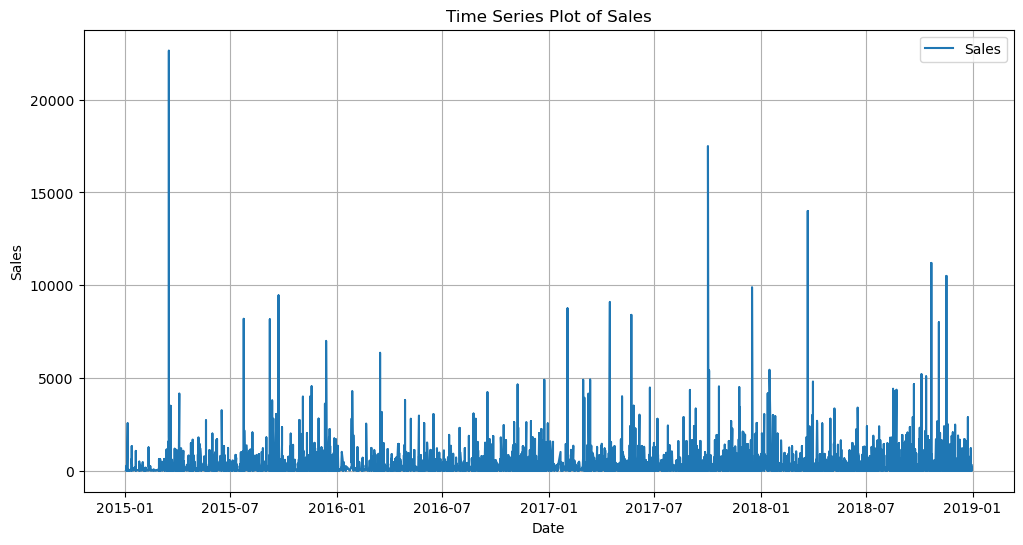

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_ts['Sales'], label='Sales')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

Can we predict the Sales using time series forcasting? 

# Stationary Check - Augmented Dickey-Fuller (ADF) Test:

H0 : time series in non stationary 
H1 : time series is stationary

In [17]:
adfuller(df_ts["Sales"])

(-98.91587853052087,
 0.0,
 0,
 9788,
 {'1%': -3.4310182688788515,
  '5%': -2.8618353343878655,
  '10%': -2.566927201367395},
 153234.64702791546)

As p = 0.0 and is thus below the signifigance level (alpha = 0.05) we can regevt H0 which indicates that the time series is stationary. 

## ACF and PACF Plot:

<Figure size 1200x600 with 0 Axes>

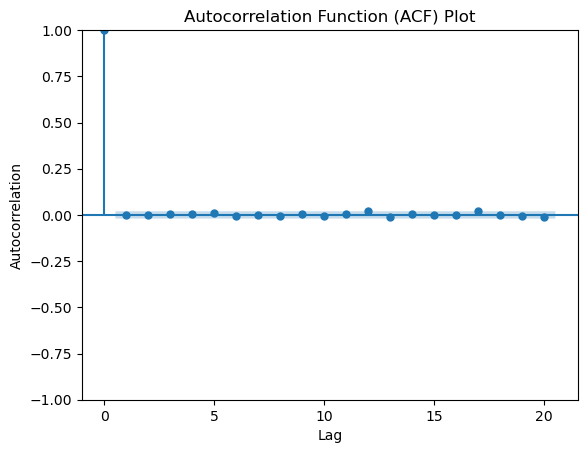

In [18]:
plt.figure(figsize=(12, 6))
plot_acf(df_ts, lags=20)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

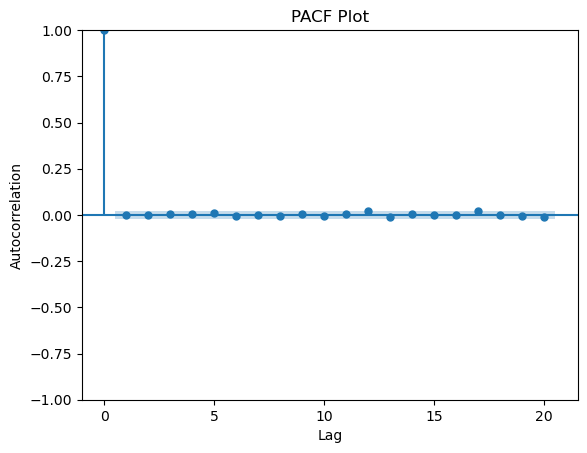

In [19]:
plt.figure(figsize=(12, 6))
plot_pacf(df_ts, lags=20)
plt.title('PACF Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [20]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append( [   sm.ARIMA(df_ts["Sales"], order=(p, 0, q) ).fit().aic, p, q   ] )

C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

In [21]:
aicVals

[[153830.79365899516, 0, 0],
 [153832.74123230175, 0, 1],
 [153834.6731778786, 0, 2],
 [153836.20080638377, 0, 3],
 [153837.95374179655, 0, 4],
 [153832.74060076027, 1, 0],
 [153834.7410710259, 1, 1],
 [153836.54406305758, 1, 2],
 [153838.142005498, 1, 3],
 [153840.19643438686, 1, 4],
 [153834.67017459194, 2, 0],
 [153836.67051656242, 2, 1],
 [153838.55507640113, 2, 2],
 [153839.8409804957, 2, 3],
 [153841.68112398696, 2, 4],
 [153836.21288802318, 3, 0],
 [153838.21318088387, 3, 1],
 [153835.93183487395, 3, 2],
 [153842.2079510595, 3, 3],
 [153843.9595205679, 3, 4],
 [153837.96737450315, 4, 0],
 [153839.96775467717, 4, 1],
 [153841.96960114033, 4, 2],
 [153843.9627443073, 4, 3],
 [153844.95031042967, 4, 4]]

In [22]:
model = sm.ARIMA(df_ts["Sales"], order=(0, 0, 0)).fit()

C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 9789
Model:                          ARIMA   Log Likelihood              -76913.397
Date:                Sun, 26 Nov 2023   AIC                         153830.794
Time:                        22:04:20   BIC                         153845.172
Sample:                             0   HQIC                        153835.666
                               - 9789                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.0545      9.463     24.312      0.000     211.508     248.601
sigma2      3.923e+05    675.235    580.911      0.000    3.91e+05    3.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          38756810.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            13.05
Prob(H) (two-sided):                  0.00   Kurtosis:                       310.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast Steps

In [24]:
arima_result = model

# Make one-step-ahead forecasts for the last 10 observations
forecasts_last_10 = arima_result.predict(start = len(df_ts["Sales"])-10, end = len(df_ts["Sales"])-1, dynamic=False, typ='levels')

# Get the actual values for the last 10 observations
actual_last_10 = df_ts["Sales"][-10:]

# Calculate forecast errors
forecast_errors = actual_last_10 - forecasts_last_10

In [25]:
# Display forecast errors
print("Forecast Errors for the Last 10 Observations:")
print(forecast_errors)

Forecast Errors for the Last 10 Observations:
Order Date
2018-12-29   -128.934466
2018-12-29   -217.524466
2018-12-29   -161.594466
2018-12-30    -20.754466
2018-12-30   -209.334466
2018-12-30     93.081534
2018-12-30   -177.278466
2018-12-30   -139.124466
2018-12-30   -216.150466
2018-12-30   -227.030466
dtype: float64


## Reading in Data Set

In [31]:
df1 = pd.read_csv('covid19_tweets.csv', na_values = 'na')

## Investigating Data Set

In [32]:
df1.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description      user_created  \
0  wednesday addams as a disney princess keepin i...  26/05/2017 05:46   
1  Husband, Father, Columnist & Commentator. Auth...  16/04/2009 20:06   
2  #Christian #Catholic #Conservative #Reagan #Re...  28/02/2009 18:57   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  07/03/2019 01:45   
4  🖊️Official Twitter handle of Department of Inf...  12/02/2017 06:45   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

               date                                               text  \
0  25/07/2020 12:27  If I smelled the scent of hand sanitizers toda...   
1  25/07/2020 12:27  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  25/07/2020 12:27  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  25/07/2020 12:27  @brookbanktv The one gift #COVID19 has give me...   
4  25/07/2020 12:27  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [33]:
df1.tail()

user_name               user_location  \
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description      user_created  \
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea  30/12/2013 18:59   
179104  When your cat has more baking soda than Ninja ...  21/12/2011 04:41   
179105  ⚒️ The Architects of Free Trade ⚒️ Really Did ...  13/07/2016 17:21   
179106  Global UX UI Visual Designer. StoryTeller, Mus...  27/10/2009 17:43   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...  14/04/2018 17:30   

        user_followers  user_friends  user_favourites  user_verified  \
179103             412          1609             1062          False   
179104             150           182             7295          False   
179105            1623          2160            98000          False   
179106            1338          1111                0          False   
179107              97          1697              566          False   

                    date                                               text  \
179103  29/08/2020 19:44  Thanks @IamOhmai for nominating me for the @WH...   
179104  29/08/2020 19:44  2020! The year of insanity! Lol! #COVID19 http...   
179105  29/08/2020 19:44  @CTVNews A powerful painting by Juan Lucena. I...   
179106  29/08/2020 19:44  More than 1,200 students test positive for #CO...   
179107  29/08/2020 19:44  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

             hashtags               source  is_retweet  
179103  ['WearAMask']  Twitter for Android       False  
179104    ['COVID19']  Twitter for Android       False  
179105            NaN      Twitter Web App       False  
179106    ['COVID19']   Twitter for iPhone       False  
179107            NaN  Twitter for Android       False

In [34]:
df1.info() #information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [35]:
print(df1.isnull().sum())

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64


In [36]:
df = df.fillna('None')

## Word Cloud for Tweets and Hashtags

In [37]:
def wordcloud(string,color):
    wc = WordCloud(background_color=color, width=1200,height=600,mask=None,random_state=1,
                   max_font_size=200,stopwords=stop_words,collocations=False).generate(string)
    fig=plt.figure(figsize=(20,8))
    plt.axis('off')
    plt.imshow(wc)

In [38]:
stop_words=set(STOPWORDS)
# stop words are common works (a, it , the etc) that we dont want in the word cloud

In [39]:
text_string = " ".join(df1['text'].astype('str'))
hashtag_string = " ".join(df1['hashtags'].astype('str'))
location_string = " ".join(df1['user_location'].astype('str'))

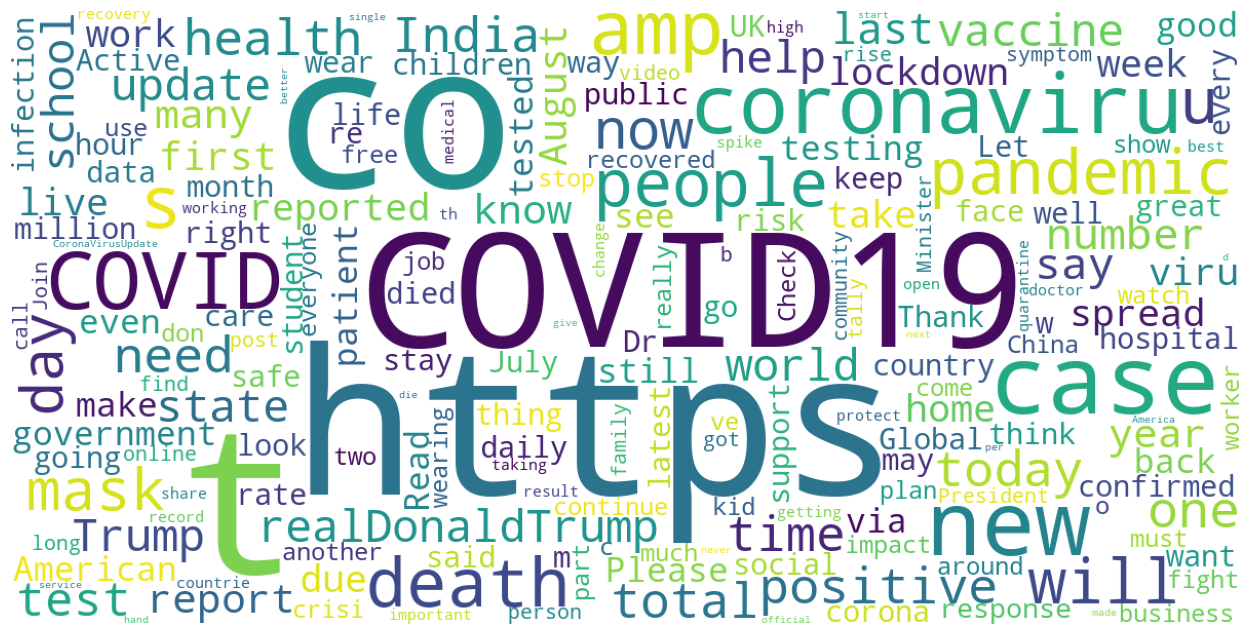

In [40]:
wordcloud(text_string,'white')

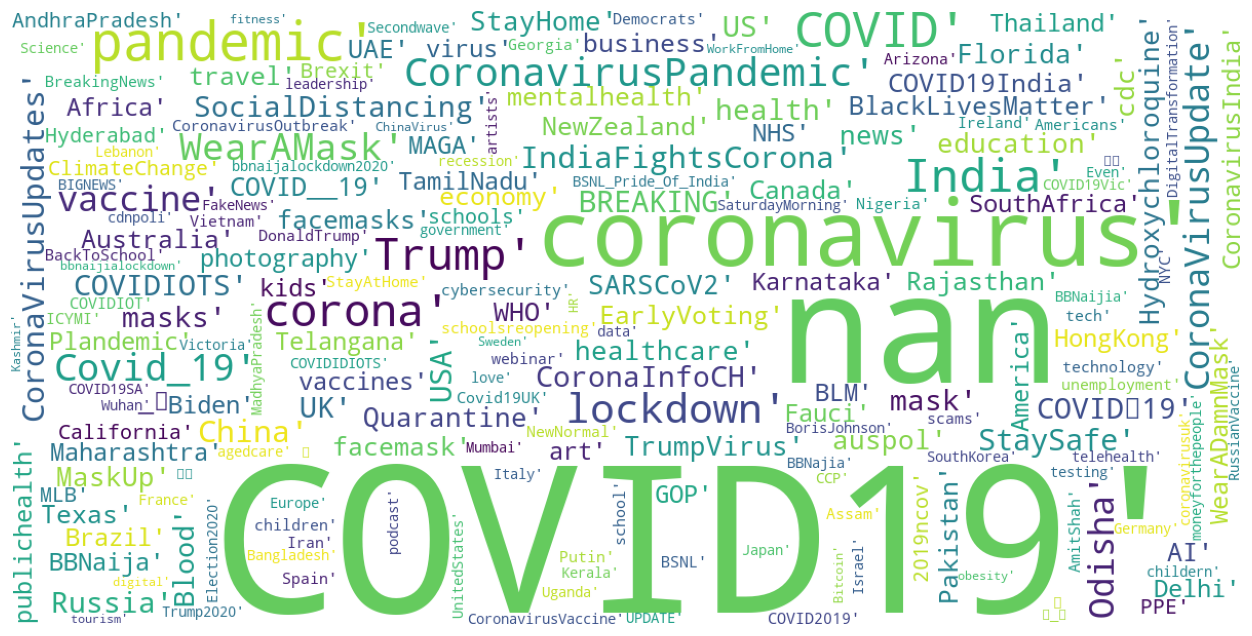

In [41]:
wordcloud(hashtag_string,'white')

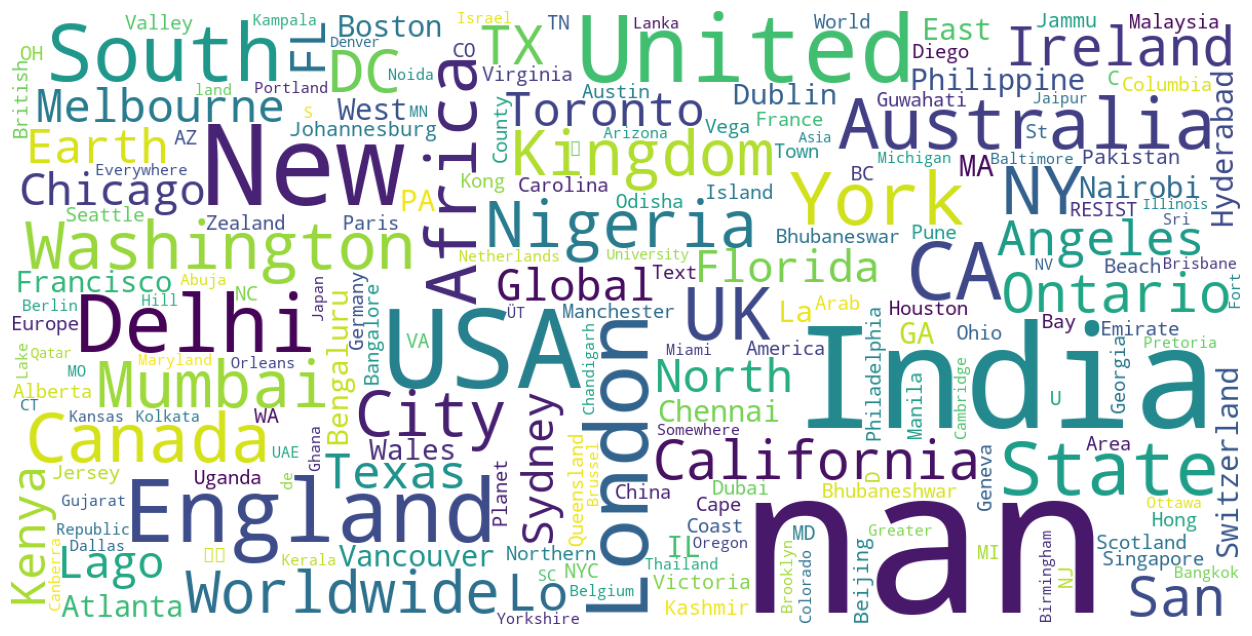

In [42]:
wordcloud(location_string,'white')

## To perform sentiment analysis, we will need the tweets that area already labelled. This has been used for India (which is one of the biggest locations on the world cloud) and is taken from here : https://www.kaggle.com/datasets/surajkum1198/twitterdata/data

In [43]:
df2 = pd.read_csv('finalSentimentdata2.csv', na_values = 'na')

In [44]:
df2.head()

Unnamed: 0 sentiment                                               text
0        3204       sad  agree the poor in india are treated badly thei...
1        1431       joy  if only i could have spent the with this cutie...
2         654       joy  will nature conservation remain a priority in ...
3        2530       sad  coronavirus disappearing in italy show this to...
4        2296       sad  uk records lowest daily virus death toll since...

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 1   sentiment   3090 non-null   object
 2   text        3090 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.6+ KB


## Word Cloud

In [46]:
text2_string = " ".join(df2['text'].astype('str'))

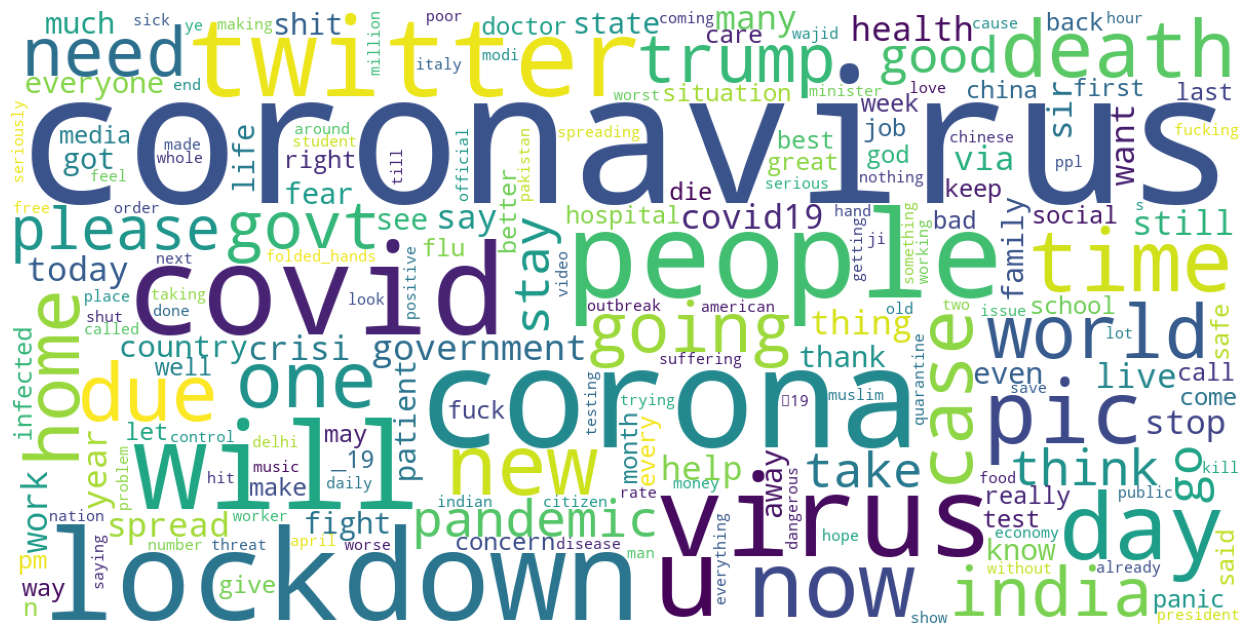

In [47]:
wordcloud(text2_string,'white')

## Data Cleaning

- removing emojies and symbols

In [48]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [49]:
df2['text'] = df2['text'].apply(lambda x: remove_emoji(x))

## Splitting the Data Set

In [50]:
train,valid = train_test_split(df2,test_size = 0.2,random_state=42,stratify = df2.sentiment.values)

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\multiflow\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.text.values)
X_valid = vectorizer.transform(valid.text.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

Count Vectorization is usually quite sensitive to stop words but we have removed these 
- as well can use count vectorization as the language in this is quite simple, and its a small data set

## Build Machine Learning Model to Predict Sentiment

In [53]:
model = LogisticRegression()
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]

In [54]:
grid = dict(C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy')

In [55]:
grid_result = grid_search.fit(X_train, y_train)

In [56]:
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

Best: 0.675 using {'C': 1.0}


# CA2 - Dashboard Creation

## Cleaning for this data was performed in CA1

In [57]:
df.head()

Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                           
2015-01-03  CA-2015-103800  07/01/2015  Standard Class    DP-13000   
2015-01-04  CA-2015-112326  08/01/2015  Standard Class    PO-19195   
2015-01-04  CA-2015-112326  08/01/2015  Standard Class    PO-19195   
2015-01-04  CA-2015-112326  08/01/2015  Standard Class    PO-19195   
2015-01-05  CA-2015-141817  12/01/2015  Standard Class    MB-18085   

            Customer Name      Segment        Country          City  \
Order Date                                                            
2015-01-03  Darren Powers     Consumer  United States       Houston   
2015-01-04  Phillina Ober  Home Office  United States    Naperville   
2015-01-04  Phillina Ober  Home Office  United States    Naperville   
2015-01-04  Phillina Ober  Home Office  United States    Naperville   
2015-01-05     Mick Brown     Consumer  United States  Philadelphia   

                   State  Postal Code   Region       Product ID  \
Order Date                                                        
2015-01-03         Texas      77095.0  Central  OFF-PA-10000174   
2015-01-04      Illinois      60540.0  Central  OFF-BI-10004094   
2015-01-04      Illinois      60540.0  Central  OFF-ST-10002743   
2015-01-04      Illinois      60540.0  Central  OFF-LA-10003223   
2015-01-05  Pennsylvania      19143.0     East  OFF-AR-10003478   

                   Category Sub-Category  \
Order Date                                 
2015-01-03  Office Supplies        Paper   
2015-01-04  Office Supplies      Binders   
2015-01-04  Office Supplies      Storage   
2015-01-04  Office Supplies       Labels   
2015-01-05  Office Supplies          Art   

                                                 Product Name    Sales  
Order Date                                                              
2015-01-03  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448  
2015-01-04         GBC Standard Plastic Binding Systems Combs    3.540  
2015-01-04                      SAFCO Boltless Steel Shelving  272.736  
2015-01-04                                          Avery 508   11.784  
2015-01-05  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536

In [58]:
df.tail()

Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                           
2018-12-30  CA-2018-143259  03/01/2019  Standard Class    PO-18865   
2018-12-30  CA-2018-143259  03/01/2019  Standard Class    PO-18865   
2018-12-30  CA-2018-143259  03/01/2019  Standard Class    PO-18865   
2018-12-30  CA-2018-115427  03/01/2019  Standard Class    EB-13975   
2018-12-30  CA-2018-156720  03/01/2019  Standard Class    JM-15580   

                Customer Name    Segment        Country           City  \
Order Date                                                               
2018-12-30  Patrick O'Donnell   Consumer  United States  New York City   
2018-12-30  Patrick O'Donnell   Consumer  United States  New York City   
2018-12-30  Patrick O'Donnell   Consumer  United States  New York City   
2018-12-30         Erica Bern  Corporate  United States      Fairfield   
2018-12-30      Jill Matthias   Consumer  United States       Loveland   

                 State  Postal Code Region       Product ID         Category  \
Order Date                                                                     
2018-12-30    New York      10009.0   East  FUR-BO-10003441        Furniture   
2018-12-30    New York      10009.0   East  OFF-BI-10003684  Office Supplies   
2018-12-30    New York      10009.0   East  TEC-PH-10004774       Technology   
2018-12-30  California      94533.0   West  OFF-BI-10002103  Office Supplies   
2018-12-30    Colorado      80538.0   West  OFF-FA-10003472  Office Supplies   

           Sub-Category                                       Product Name  \
Order Date                                                                   
2018-12-30    Bookcases  Bush Westfield Collection Bookcases, Fully Ass...   
2018-12-30      Binders               Wilson Jones Legal Size Ring Binders   
2018-12-30       Phones                          Gear Head AU3700S Headset   
2018-12-30      Binders    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   
2018-12-30    Fasteners                                Bagged Rubber Bands   

              Sales  
Order Date           
2018-12-30  323.136  
2018-12-30   52.776  
2018-12-30   90.930  
2018-12-30   13.904  
2018-12-30    3.024

In [59]:
# Calculate average sales for each state
average_sales = df.groupby('State')['Sales'].mean().reset_index()

# Merge the average sales back into the original DataFrame
df = pd.merge(df, average_sales, on = 'State', how = 'left')

# Rename the new column
df.rename(columns = {'Sales_y': 'Average_Sales'}, inplace = True)
df.rename(columns = {'Sales_x': 'Sales'}, inplace = True)

In [60]:
df.head()

Order ID   Ship Date       Ship Mode Customer ID  Customer Name  \
0  CA-2015-103800  07/01/2015  Standard Class    DP-13000  Darren Powers   
1  CA-2015-112326  08/01/2015  Standard Class    PO-19195  Phillina Ober   
2  CA-2015-112326  08/01/2015  Standard Class    PO-19195  Phillina Ober   
3  CA-2015-112326  08/01/2015  Standard Class    PO-19195  Phillina Ober   
4  CA-2015-141817  12/01/2015  Standard Class    MB-18085     Mick Brown   

       Segment        Country          City         State  Postal Code  \
0     Consumer  United States       Houston         Texas      77095.0   
1  Home Office  United States    Naperville      Illinois      60540.0   
2  Home Office  United States    Naperville      Illinois      60540.0   
3  Home Office  United States    Naperville      Illinois      60540.0   
4     Consumer  United States  Philadelphia  Pennsylvania      19143.0   

    Region       Product ID         Category Sub-Category  \
0  Central  OFF-PA-10000174  Office Supplies        Paper   
1  Central  OFF-BI-10004094  Office Supplies      Binders   
2  Central  OFF-ST-10002743  Office Supplies      Storage   
3  Central  OFF-LA-10003223  Office Supplies       Labels   
4     East  OFF-AR-10003478  Office Supplies          Art   

                                        Product Name    Sales  Average_Sales  
0  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448     173.250290  
1         GBC Standard Plastic Binding Systems Combs    3.540     164.050760  
2                      SAFCO Boltless Steel Shelving  272.736     164.050760  
3                                          Avery 508   11.784     164.050760  
4  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536     199.788058

In [61]:
# Convert the 'Shipping_Date' column to datetime objects
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format="%d/%m/%Y")

# Extract the year from the 'Shipping_Date' column
df['Year'] = df['Ship Date'].dt.year

In [62]:
# Group by state and sum the sales
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the data by sales in descending order and get the top five states
top_five_states = state_sales.sort_values(by='Sales', ascending=False).head(5)

print(top_five_states)

           State        Sales
3     California  446306.4635
30      New York  306361.1470
41         Texas  168572.5322
44    Washington  135206.8500
36  Pennsylvania  116276.6500


In [63]:
# Group by the and state
grouped_sales_year = df.groupby('Year').agg({'Sales': 'sum'}).reset_index()

# Display the grouped data
print(grouped_sales_year)

   Year        Sales
0  2015  467041.8731
1  2016  462182.2884
2  2017  599339.2850
3  2018  718884.2694
4  2019    5159.6968


In [64]:
df.info() #information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9789 entries, 0 to 9788
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9789 non-null   object        
 1   Ship Date      9789 non-null   datetime64[ns]
 2   Ship Mode      9789 non-null   object        
 3   Customer ID    9789 non-null   object        
 4   Customer Name  9789 non-null   object        
 5   Segment        9789 non-null   object        
 6   Country        9789 non-null   object        
 7   City           9789 non-null   object        
 8   State          9789 non-null   object        
 9   Postal Code    9789 non-null   float64       
 10  Region         9789 non-null   object        
 11  Product ID     9789 non-null   object        
 12  Category       9789 non-null   object        
 13  Sub-Category   9789 non-null   object        
 14  Product Name   9789 non-null   object        
 15  Sales          9789 n

## Sales per State for Years

In [65]:
# Mapping dictionary for state abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Replace state names with abbreviations
df['State'] = df['State'].map(state_abbr)

In [66]:
# Plot an interactive map with average sales data and a slider
states = px.choropleth(
    df,
    locations='State',
    locationmode='USA-states',
    color='Average_Sales',
    hover_name='State',
    animation_frame='Year',
    scope='usa',
    color_continuous_scale='Viridis',
    title='Average Sales by State (Yearly)',
    range_color=[0, max(df['Average_Sales'])]
)

## Average Sales for Item and Sub Item based on Year

In [67]:
# Calculate average sales for each combination of Year, Item, and SubItem
avg_sales = df.groupby(['Year', 'Category', 'Sub-Category'], as_index=False)['Sales'].mean()

In [68]:
# Find the top 5 subcategories for each combination of Year and Item
top_subcategories = (avg_sales.groupby(['Year', 'Category'], as_index = False).apply(lambda x: x.nlargest(5, 'Sales')).reset_index(drop = True)) 

In [69]:
# Create an interactive plot
cat = px.bar(top_subcategories, 
             x = 'Category', 
             y = 'Sales', 
             color = 'Sub-Category', 
             animation_frame = 'Year',
             labels = {'Sales': 'Average Sales'},
             title = 'Average Sales by Item and SubItem Over Years')

## Percentage of Different Consumers

In [70]:
# Count the occurrences of each category
category_counts = df['Segment'].value_counts()

# Calculate the percentage for each category
df_percentage = pd.DataFrame({'Segment': category_counts.index,'Percentage': (category_counts / len(df)) * 100})

print(df_percentage)

                 Segment  Percentage
Segment                             
Consumer        Consumer   52.058433
Corporate      Corporate   30.115436
Home Office  Home Office   17.826131


In [71]:
# Create an interactive pie chart
cust_pi = px.pie(df_percentage, names='Segment', values='Percentage',
             title = 'Distribution of Customers',
             hover_data = ['Percentage'],
             labels = {'Percentage': 'Percentage (%)'})

## Sales over years 

In [72]:
total_sales_per_day = df.groupby(['Year', 'Ship Date'])['Sales'].sum().reset_index()

In [73]:
total_sales_per_day

Year  Ship Date      Sales
0     2015 2015-01-07    29.2280
1     2015 2015-01-08   307.5000
2     2015 2015-01-10  4374.8800
3     2015 2015-01-12   106.6940
4     2015 2015-01-13    40.5440
...    ...        ...        ...
1321  2019 2019-01-01  2390.1548
1322  2019 2019-01-02  1545.6240
1323  2019 2019-01-03   569.2740
1324  2019 2019-01-04   344.2240
1325  2019 2019-01-05   310.4200

[1326 rows x 3 columns]

In [74]:
# Create a Plotly Express line plot
sales = px.line(total_sales_per_day, x='Ship Date', y='Sales', color='Year', title='Sales Over Time by Year')

# Panel DashBoard 

In [75]:
title = '# Our Customer Base'

In [76]:
png = pn.panel('https://cdn.smartkarrot.com/wp-content/uploads/2020/10/Customer-Base.png', width = 500) 

In [77]:
text = """
MadeUpCompany Ltd's Customer Base. This dashboard contains information about our customer base in the United States for the years 2015 - 2019.

- Average Sales per State (filtered by year)
    - Wyoming had the highest sales overall, in 2017.
    - Overall, sales are consistent across states and years (2019 is not complete)
- Average Sales per Item Category (Hover over to see Sub Categories!)
    - Technology is consistently the most popular category year on year, with machines and copiers being the top sub categories. 
- Sales over time by Year: double click the legend to isolate a certain year, you can also look at different years together 
    - All years follow a similar trend, but the most sales occured in 2018 (2019 has only just started so there is not enough data!)
- Pie Chart for Customer Type (Hover over to see percentage!)
    - Consumer is the most popular. 
    
The hope of this dashboard is to be used as a jumping off point to see where we can increase customer satisfaction and spend based on location, customer type, and item bought. 
"""

### Create Panel:

In [78]:
# LHS column:
LHS_box = pn.WidgetBox(pn.Column(title, png, pn.Row(pn.Tabs(('Total Sales per Year', grouped_sales_year), ('Top 5 States Overall', top_five_states))), pn.Row(text), pn.Row(pn.pane.Plotly(cust_pi, height = 500)), pn.layout.Spacer(margin = 200), width = 500, height = 1500, align = "center"))
# RHS column:
RHS_box = pn.WidgetBox(pn.Column(pn.layout.HSpacer()), pn.Row(pn.pane.Plotly(states)), pn.Row(pn.pane.Plotly(cat)), pn.Row(pn.pane.Plotly(sales)), align="start", width=600)
# Dashboard
dashboard = pn.Row(LHS_box, RHS_box, sizing_mode="stretch_width")
dashboard

Row(sizing_mode='stretch_width')
    [0] WidgetBox
        [0] Column(align='center', height=1500, sizing_mode='fixed', width=500)
            [0] Markdown(str)
            [1] PNG(str, width=500)
            [2] Row
                [0] Tabs
                    [0] DataFrame(DataFrame, name='Total Sales per Year')
                    [1] DataFrame(DataFrame, name='Top 5 States Overall')
            [3] Row
                [0] Markdown(str)
            [4] Row
                [0] Plotly(Figure, height=500)
            [5] Spacer(margin=200)
    [1] WidgetBox(width=600)
        [0] Column
            [0] HSpacer()
        [1] Row
            [0] Plotly(Figure)
        [2] Row
            [0] Plotly(Figure)
        [3] Row
            [0] Plotly(Figure)

In [80]:
dashboard.show(port=5006)

Launching server at http://localhost:5006
